<a href="https://colab.research.google.com/github/ANCAMABEBA/Module5/blob/main/CouponsAnalysisMaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('sample_data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [48]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [4]:
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# based on data inspection, car column is missing in 12576/12684, therefore we will drop this colum
data_wo_cars = data.drop(columns=["car"])
# for the rest of columns with NAs, we will treat missing as its own class, the volume is relatively low
data_wo_cars["Bar"] = data_wo_cars["Bar"].fillna("Missing")
data_wo_cars["CoffeeHouse"] = data_wo_cars["CoffeeHouse"].fillna("Missing")
data_wo_cars["CarryAway"] = data_wo_cars["CarryAway"].fillna("Missing")
data_wo_cars["RestaurantLessThan20"] = data_wo_cars["RestaurantLessThan20"].fillna("Missing")
data_wo_cars["Restaurant20To50"] = data_wo_cars["Restaurant20To50"].fillna("Missing")
# we verify null values after these actions are taken. We can observe that car column was dropped from the dataset and we don't have columns with null values any more
print(data_wo_cars.isnull().sum())

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64


4. What proportion of the total observations chose to accept the coupon?



In [6]:
# we use the method count_values to determine what proportion of the total observations chose to accept the coupon. (~57% accepted the coupon)
print(data_wo_cars["Y"].value_counts(normalize=True))

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


In [7]:
# Was the proportion similar across the different types of coupons? The acceptance proportion varies significantly ny coupon type, being "Carry out & Take away" the ones with the highest acceptance and Restaurant(20-50)the one with the lowest
# to answer this question, we apply value_counts to slices for each of the coupon types
# Coffee House acceptance proportion (~50%)
print("Coffee House",data_wo_cars[data_wo_cars["coupon"] == "Coffee House"]["Y"].value_counts(normalize=True))
# Restaurant(<20) acceptance proportion (70%)
print("Restaurant(<20)",data_wo_cars[data_wo_cars["coupon"] == "Restaurant(<20)"]["Y"].value_counts(normalize=True))
# Carry out & Take away acceptance proportion (~71%)
print("Carry out & Take away",data_wo_cars[data_wo_cars["coupon"] == "Carry out & Take away"]["Y"].value_counts(normalize=True))
# Bar acceptance proportion (~41%)
print("Bar",data_wo_cars[data_wo_cars["coupon"] == "Bar"]["Y"].value_counts(normalize=True))
# Restaurant(20-50) acceptance proportion (~44%)
print("Restaurant(20-50)",data_wo_cars[data_wo_cars["coupon"] == "Restaurant(20-50)"]["Y"].value_counts(normalize=True))

Coffee House Y
0    0.500751
1    0.499249
Name: proportion, dtype: float64
Restaurant(<20) Y
1    0.707107
0    0.292893
Name: proportion, dtype: float64
Carry out & Take away Y
1    0.735478
0    0.264522
Name: proportion, dtype: float64
Bar Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64
Restaurant(20-50) Y
0    0.558981
1    0.441019
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

<Axes: xlabel='coupon'>

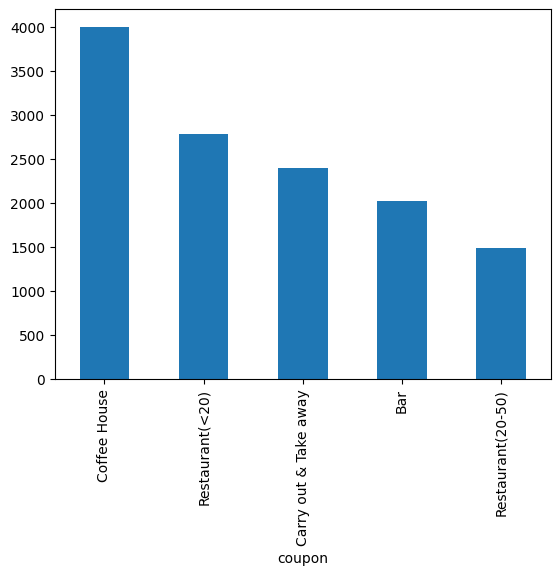

In [8]:
data_wo_cars["coupon"].value_counts().plot(kind="bar")

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

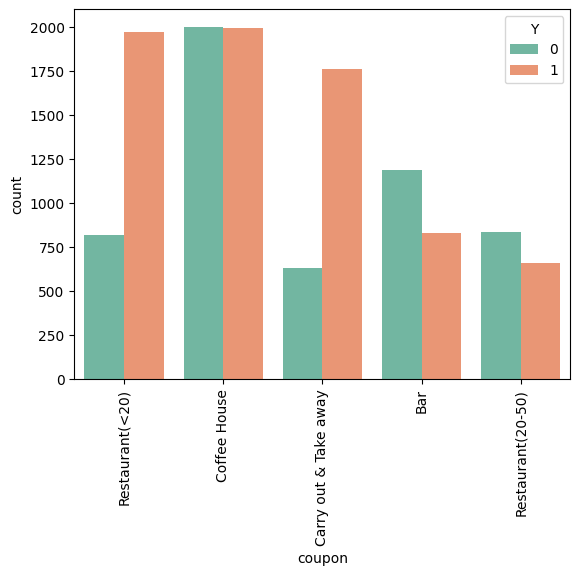

In [9]:
# we can use the following to visualize the different acceptance rates by coupon type. We can clearly observe that coupons with the best chances to be accepted are inexpensive restaurants and take aways
sns.countplot(data=data_wo_cars,x="coupon",hue="Y",palette='Set2')
plt.xticks(rotation=90)

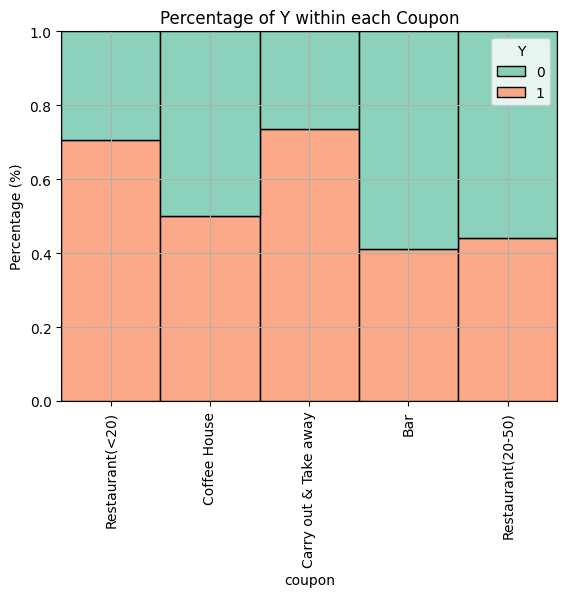

In [10]:
# Same info in percentages using Seaborn
sns.histplot(
    data=data_wo_cars,
    x="coupon",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each Coupon")
plt.grid(True)
plt.show()


6. Use a histogram to visualize the temperature column.

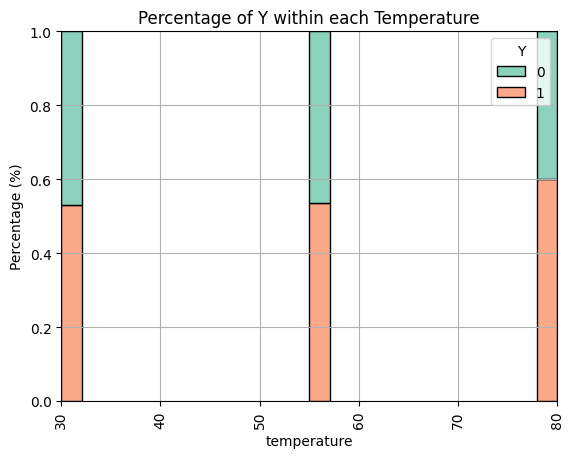

In [11]:
# We inspect the temperature column using Seaborn. Better acceptance rates happen with higher temperatures
sns.histplot(
    data=data_wo_cars,
    x="temperature",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each Temperature")
plt.grid(True)
plt.show()

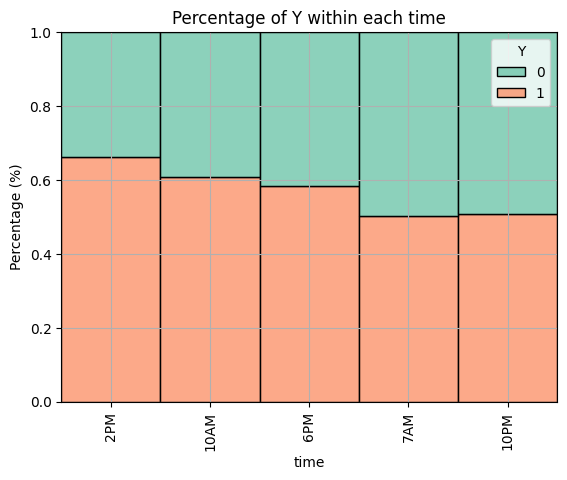

In [13]:
# we can do the same with time. 2 pm presents the highest acceptance proportion
sns.histplot(
    data=data_wo_cars,
    x="time",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each time")
plt.grid(True)
plt.show()

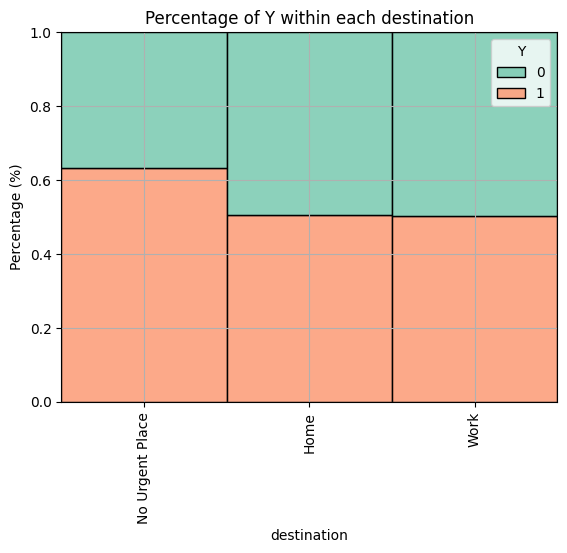

In [14]:
# destination. As expected, customers with not urgent place as destination are more likely to accept
sns.histplot(
    data=data_wo_cars,
    x="destination",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each destination")
plt.grid(True)
plt.show()

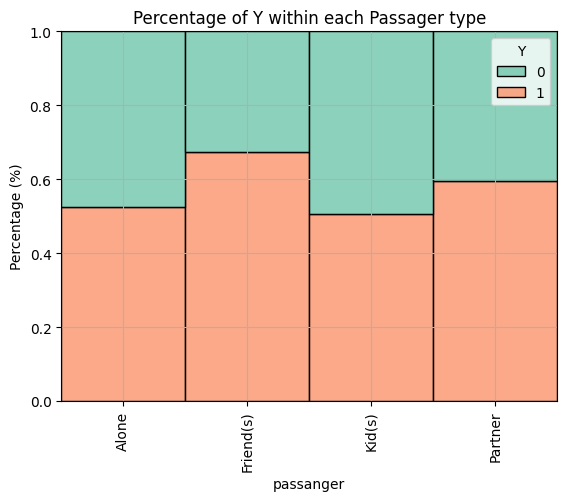

In [15]:
# passanger. Passangers with friends or partner seems to accept more
sns.histplot(
    data=data_wo_cars,
    x="passanger",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each Passager type")
plt.grid(True)
plt.show()

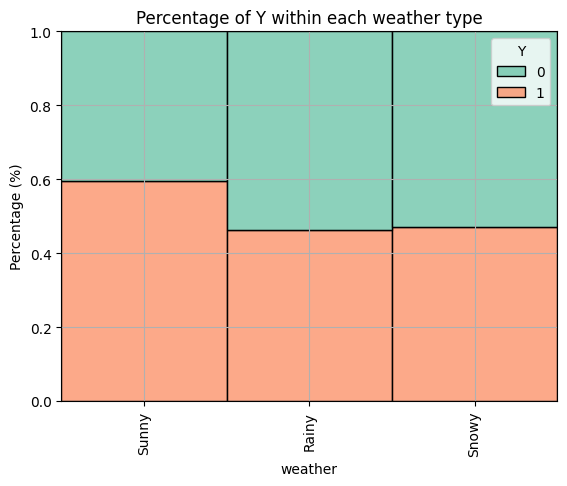

In [16]:
# weather. Customers accept more coupons with sunny weather
sns.histplot(
    data=data_wo_cars,
    x="weather",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each weather type")
plt.grid(True)
plt.show()

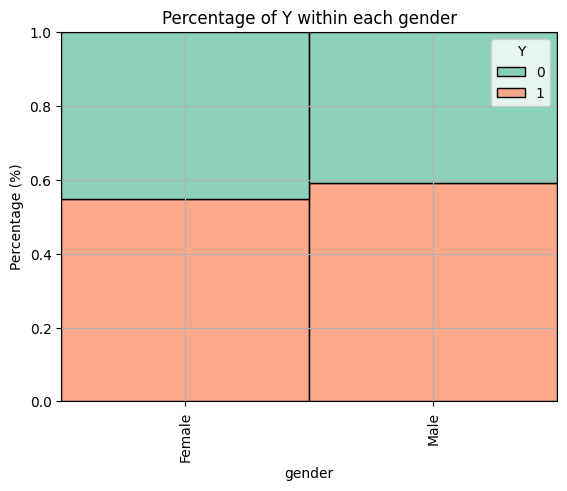

In [17]:
# gender. Males seems to accept slightly more than females
sns.histplot(
    data=data_wo_cars,
    x="gender",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each gender")
plt.grid(True)
plt.show()

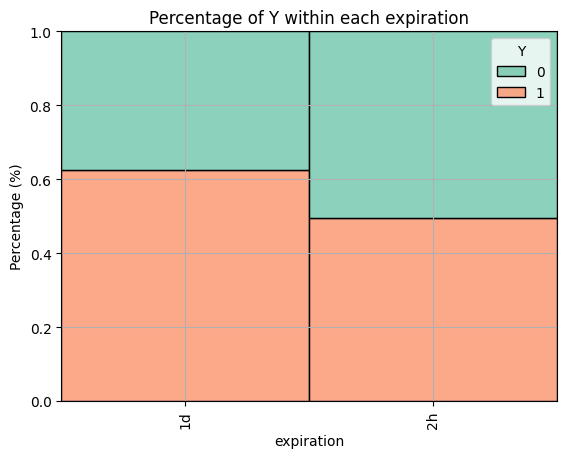

In [18]:
# expiration. Coupons with 1 d expiration are accepted more frequently than those expiring in 2 hours
sns.histplot(
    data=data_wo_cars,
    x="expiration",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each expiration")
plt.grid(True)
plt.show()

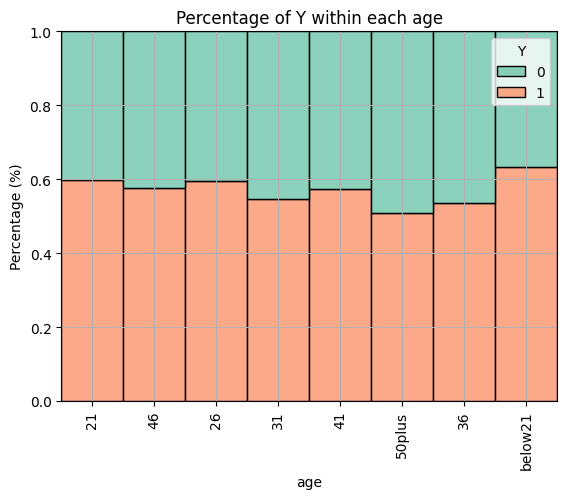

In [19]:
# age. Youger customer (< 26) seem to accept more coupons that older customers
sns.histplot(
    data=data_wo_cars,
    x="age",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each age")
plt.grid(True)
plt.show()

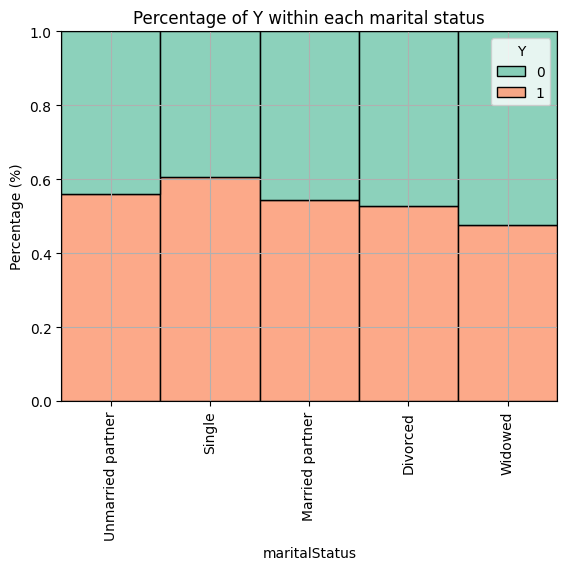

In [20]:
# Marital Status. Single customers seem to accept more coupons
sns.histplot(
    data=data_wo_cars,
    x="maritalStatus",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each marital status")
plt.grid(True)
plt.show()

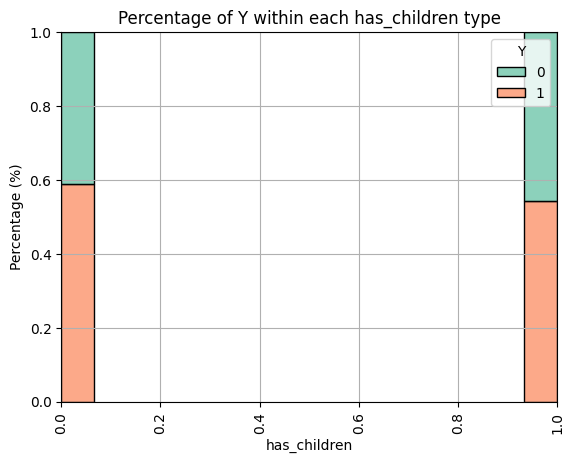

In [21]:
# has_children. Customers without children accept more
sns.histplot(
    data=data_wo_cars,
    x="has_children",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each has_children type")
plt.grid(True)
plt.show()

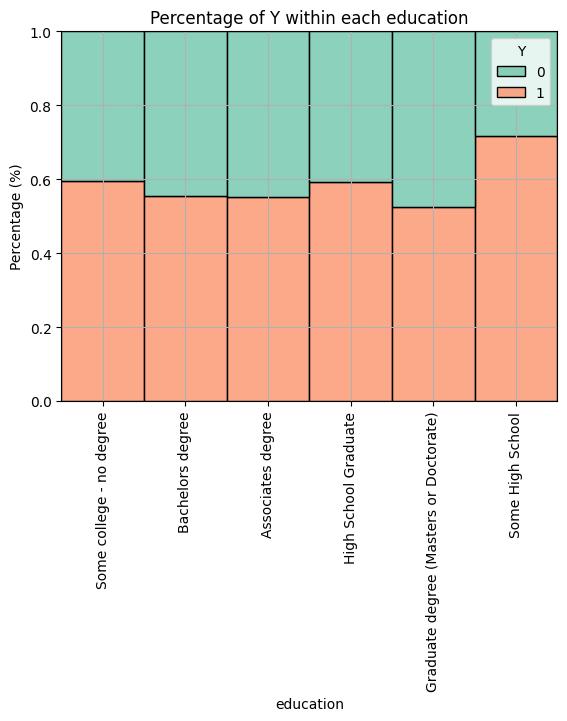

In [22]:
# education. Customer with some high school accept proportionally more
sns.histplot(
    data=data_wo_cars,
    x="education",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each education")
plt.grid(True)
plt.show()

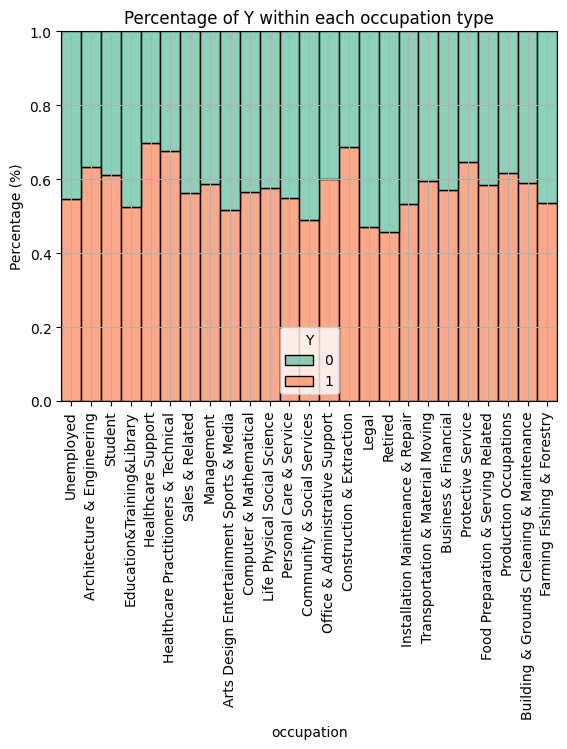

In [23]:
# occupation
sns.histplot(
    data=data_wo_cars,
    x="occupation",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each occupation type")
plt.grid(True)
plt.show()

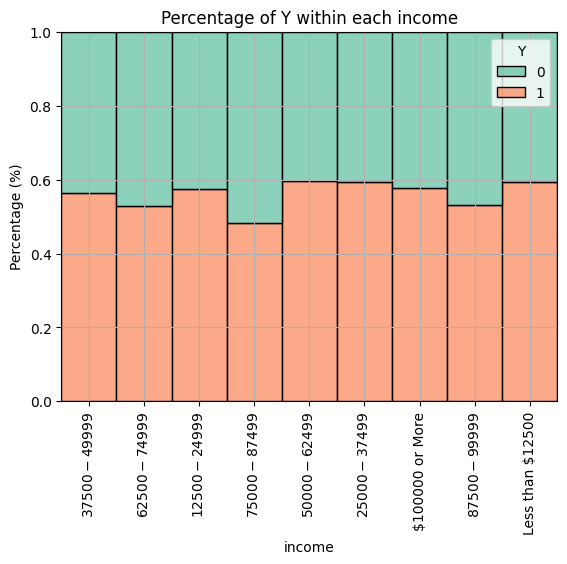

In [49]:
# income
sns.histplot(
    data=data_wo_cars,
    x="income",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each income")
plt.grid(True)
plt.show()

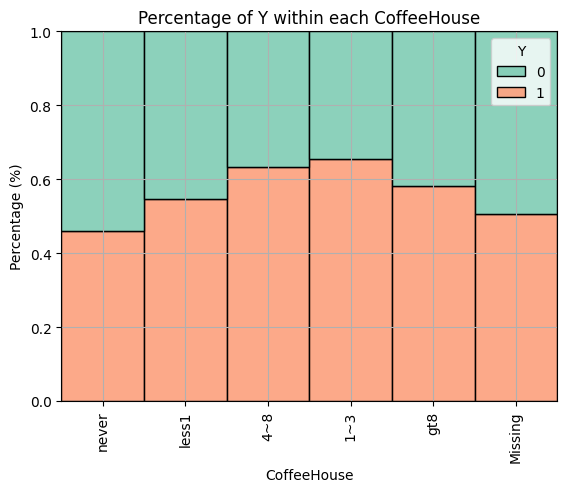

In [25]:
# Coffee House
sns.histplot(
    data=data_wo_cars,
    x="CoffeeHouse",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each CoffeeHouse")
plt.grid(True)
plt.show()

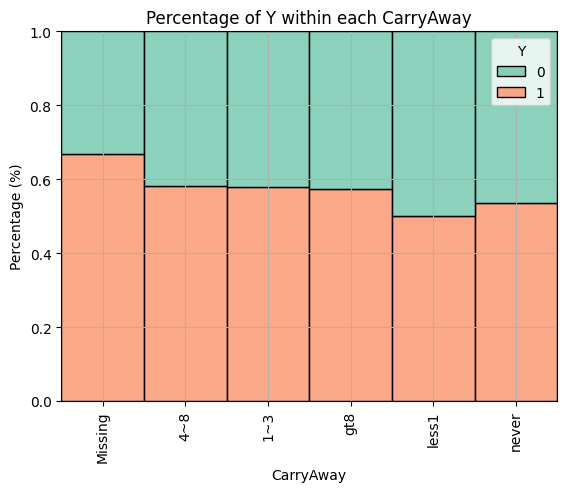

In [26]:
# CarryAway
sns.histplot(
    data=data_wo_cars,
    x="CarryAway",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each CarryAway")
plt.grid(True)
plt.show()

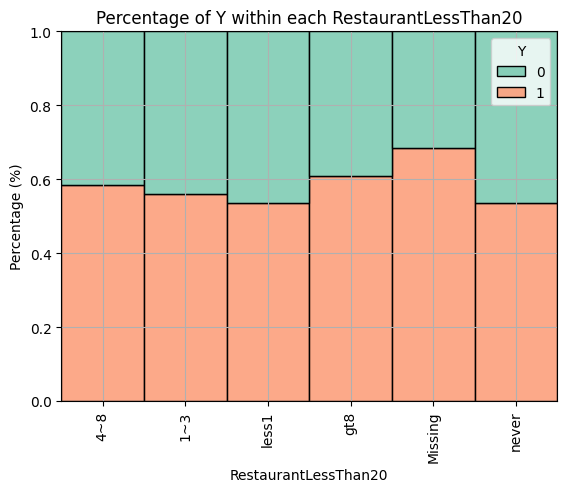

In [27]:
# RestaurantLessThan20
sns.histplot(
    data=data_wo_cars,
    x="RestaurantLessThan20",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each RestaurantLessThan20")
plt.grid(True)
plt.show()

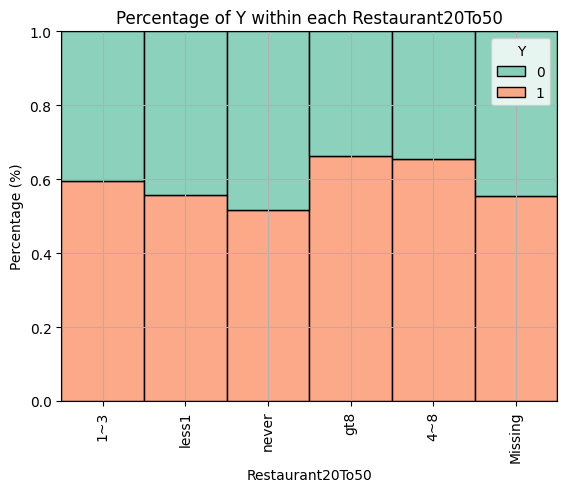

In [28]:
#Restaurant20To50
sns.histplot(
    data=data_wo_cars,
    x="Restaurant20To50",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each Restaurant20To50")
plt.grid(True)
plt.show()

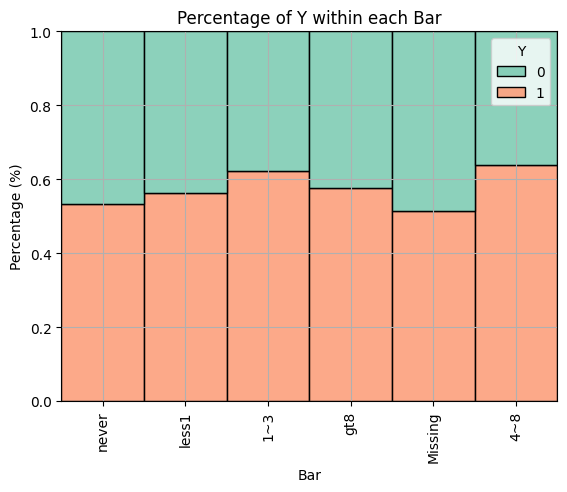

In [29]:
# Bar
sns.histplot(
    data=data_wo_cars,
    x="Bar",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each Bar")
plt.grid(True)
plt.show()

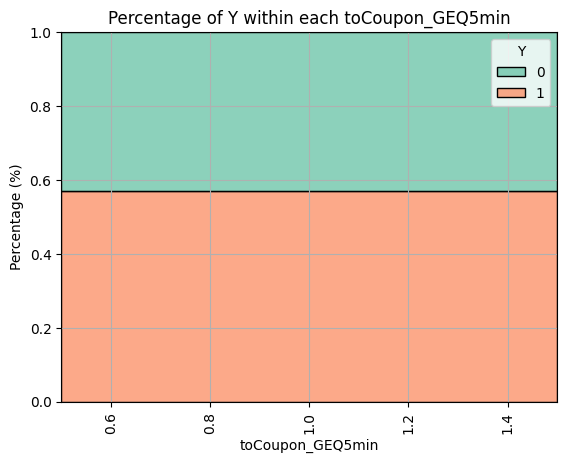

In [30]:
# toCoupon_GEQ5min. These features have to be managed jointly tohether as do not provide insight by themselves, a coupon may have more than 1 flag marked
sns.histplot(
    data=data_wo_cars,
    x="toCoupon_GEQ5min",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each toCoupon_GEQ5min")
plt.grid(True)
plt.show()

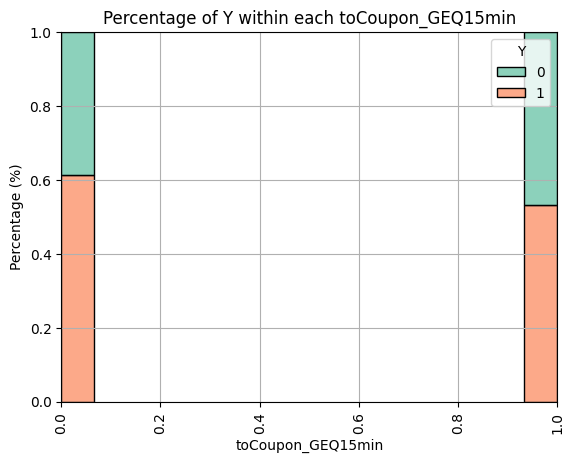

In [31]:
# toCoupon_GEQ15min. These features have to be managed jointly tohether as do not provide insight by themselves, a coupon may have more than 1 flag marked
sns.histplot(
    data=data_wo_cars,
    x="toCoupon_GEQ15min",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each toCoupon_GEQ15min")
plt.grid(True)
plt.show()

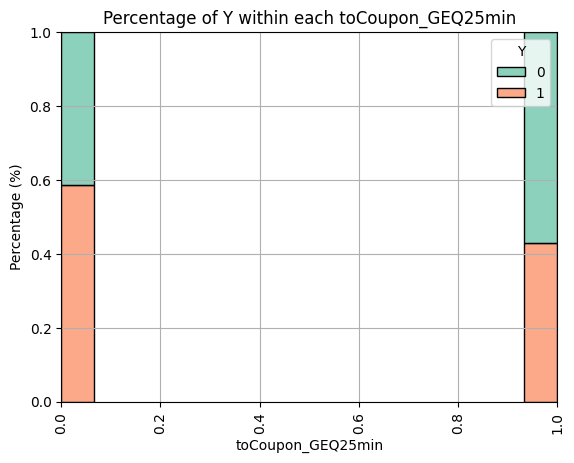

In [32]:
# toCoupon_GEQ25min. These features have to be managed jointly tohether as do not provide insight by themselves, a coupon may have more than 1 flag marked
sns.histplot(
    data=data_wo_cars,
    x="toCoupon_GEQ25min",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each toCoupon_GEQ25min")
plt.grid(True)
plt.show()

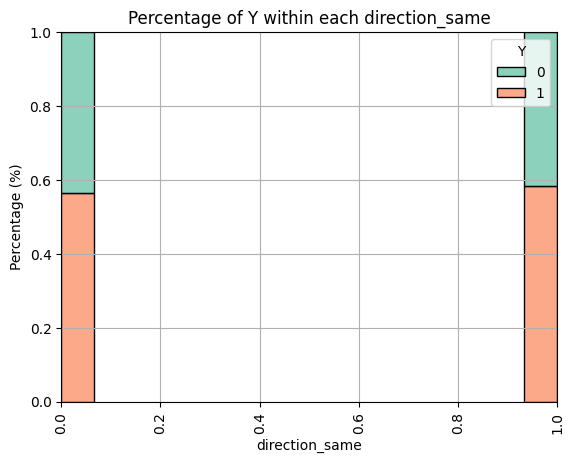

In [33]:
# direction_same
sns.histplot(
    data=data_wo_cars,
    x="direction_same",
    hue="Y",
    multiple="fill",   # stacks and normalizes to 100%
    palette='Set2',
    stat="percent"
)
plt.xticks(rotation=90)
plt.ylabel("Percentage (%)")
plt.title("Percentage of Y within each direction_same")
plt.grid(True)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [34]:
# we create a DataFrame just with the bar coupons
data_coupons_bar = data_wo_cars[data_wo_cars["coupon"]=="Bar"]

2. What proportion of bar coupons were accepted?


In [35]:
# to calculate the bar coupons acceptance rate we use the mathod value_counts
data_coupons_bar["Y"].value_counts(normalize=True)

,proportion
Y,
0,0.589985
1,0.410015


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [36]:
# To analyze cohorts like this vs. rest of sample, it is helpful to add a column flagging rows that meet an specific conditions (in this case, customers who went to a bar <=3 times). We are considering the category "missing values" as part of Bar_Less_Equal_Three
data_coupons_bar["Bar_Less_Equal_Three"] = np.where(data_coupons_bar["Bar"].isin(["never","1~3","less1", "Missing"]), 1,0)
# Once we have this new column, we can apply the value_coiunts method to calculate the acceptance ratio. We can observe that people that go more than 3 times to the bar have double probability to accept than those that go 3 or less times (for bar coupons)
data_coupons_bar.groupby("Bar_Less_Equal_Three")['Y'].value_counts(normalize=True)


/tmp/ipython-input-2447784791.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_bar["Bar_Less_Equal_Three"] = np.where(data_coupons_bar["Bar"].isin(["never","1~3","less1", "Missing"]), 1,0)


Bar_Less_Equal_Three  Y
0                     1    0.768844
                      0    0.231156
1                     0    0.629263
                      1    0.370737
Name: proportion, dtype: float64

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Similar to the previous case, we add a column to mark coupons with the customer going more than once a month and are over the age of 25
data_coupons_bar["More_Than_1Bar_Over25"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["age"].isin(["below21","22","23","24"])), 1, 0)
# then we use value_counts method to calculate the acceptance ratio. We can observe that this cohort has 70% acceptance rate vs. 29% for the rest of bar coupons
data_coupons_bar.groupby("More_Than_1Bar_Over25")['Y'].value_counts(normalize=True)

/tmp/ipython-input-509133477.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_bar["More_Than_1Bar_Over25"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["age"].isin(["below21","22","23","24"])), 1, 0)


More_Than_1Bar_Over25  Y
0                      0    0.705800
                       1    0.294200
1                      1    0.692833
                       0    0.307167
Name: proportion, dtype: float64

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [38]:
# same thing: need to create a flag for this cohort
data_coupons_bar["Cohort1"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["passanger"].isin(["Kid(s)"])) & (~data_coupons_bar["occupation"].isin(["farming","fishing","forestry"]) ), 1, 0)
# Now we can use value_counts to calculate the acceptance ratio
data_coupons_bar.groupby("Cohort1")['Y'].value_counts(normalize=True)
# Cohort 1 has significantly higher acceptance rate

/tmp/ipython-input-2417310193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_bar["Cohort1"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["passanger"].isin(["Kid(s)"])) & (~data_coupons_bar["occupation"].isin(["farming","fishing","forestry"]) ), 1, 0)


Cohort1  Y
0        0    0.703956
         1    0.296044
1        1    0.713249
         0    0.286751
Name: proportion, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [39]:
# first we define columns with flags to identify each of these cohorts
# Cohort 2: go to bars more than once a month, had passengers that were not a kid, and were not widowed
data_coupons_bar["Cohort2"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["passanger"].isin(["Kid(s)"])) & (~data_coupons_bar["maritalStatus"].isin(["Widowed"]) ), 1, 0)
# Cohort 3: go to bars more than once a month and are under the age of 30
data_coupons_bar["Cohort3"] =  np.where((~data_coupons_bar["RestaurantLessThan20"].isin(["less1","never"])) & (~data_coupons_bar["age"].isin(["31","36","41","46","50plus"]) ), 1, 0)
# Cohort 4: go to cheap restaurants more than 4 times a month and income is less than 50K.
data_coupons_bar["Cohort4"] =  np.where((data_coupons_bar["RestaurantLessThan20"].isin(["4~8","gt8"])) & (~data_coupons_bar["income"].isin(["$25000 - $37499","$12500 - $24999","$37500 - $49999","Less than $12500"]) ), 1, 0)
# Now we can add a column that is the combination of the three flags
data_coupons_bar["selected"] = data_coupons_bar["Cohort2"] | data_coupons_bar["Cohort3"] | data_coupons_bar["Cohort4"]
# finally, we use the method value_counts to calculate the acceptance ratio
data_coupons_bar.groupby("selected")['Y'].value_counts(normalize=True)
# we can observe that this combined cohhort almost double the acceptance rate comparing to the rest of population


/tmp/ipython-input-919019547.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_bar["Cohort2"] = np.where((data_coupons_bar["Bar"].isin(["1~3","4~8","gt8"])) & (~data_coupons_bar["passanger"].isin(["Kid(s)"])) & (~data_coupons_bar["maritalStatus"].isin(["Widowed"]) ), 1, 0)
/tmp/ipython-input-919019547.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_bar["Cohort3"] =  np.where((~data_coupons_bar["RestaurantLessThan20"].isin(["less1","never"])) & (~data_coupons_bar["age"].isin([

selected  Y
0         0    0.724178
          1    0.275822
1         1    0.508155
          0    0.491845
Name: proportion, dtype: float64

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [40]:
# Within the data of bar coupons:
# Drivers that go to the bar more than 3 times have more than double probability to accept the coupon (77%)
# Drivers that go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.have also more than double probability to accept (69%)
# Drivers that go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
# go to bars more than once a month and are under the age of 30 OR
# go to cheap restaurants more than 4 times a month and income is less than 50K.have also double probability to accept coupons than the rest
#
# Overall, significant features would include a combination of:
# - Customer behavior - number of times the driver goes to bars
# - demographics - income, occupation, studies
# - context - who is driving with, how far from the coupon,

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [42]:
# let's examine "Carry out and Take Away" coupon as this is the coupon with the highest acceptance rate
# we create a DataFrame just with the "Carry out and Take Away" coupons
data_coupons_TakeAway = data_wo_cars[data_wo_cars["coupon"]=="Carry out & Take away"]
#print(data_coupons_TakeAway.head())

In [43]:
# to calculate the bar coupons acceptance rate we use the mathod value_counts. ~74% were accepted
data_coupons_TakeAway["Y"].value_counts(normalize=True)

,proportion
Y,
1,0.735478
0,0.264522


In [44]:
# To analyze cohorts like this vs. rest of sample, it is helpful to add a column flagging rows that meet an specific conditions (in this case, customers who went to a Take Away <=3 times). We are considering the category "missing values" as part of Bar_Less_Equal_Three
data_coupons_TakeAway["CarryAway_Less_Equal_Three"] = np.where(data_coupons_TakeAway["CarryAway"].isin(["never","1~3","less1", "Missing"]), 1,0)
# Once we have this new column, we can apply the value_coiunts method to calculate the acceptance ratio. We can observe that people that unlike bar coupons, in this case, this cohort does not have significantly higher acceptance than the rest.
data_coupons_TakeAway.groupby("CarryAway_Less_Equal_Three")['Y'].value_counts(normalize=True)


/tmp/ipython-input-2290923068.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_TakeAway["CarryAway_Less_Equal_Three"] = np.where(data_coupons_TakeAway["CarryAway"].isin(["never","1~3","less1", "Missing"]), 1,0)


CarryAway_Less_Equal_Three  Y
0                           1    0.749554
                            0    0.250446
1                           1    0.723053
                            0    0.276947
Name: proportion, dtype: float64

In [ ]:
# For this type of coupon, let's try this cohort:
# Drivers travelling with kids and
# Times consistent with dinner time and
# Lower income and
# Going to Take Aways more than once a month


In [57]:
# first we define columns with flags to identify each of these cohorts
# Cohort TA1: go to takeaways more than once a month, had passengers that were a kid, and lower income
#data_coupons_TakeAway["CohortTA1"] = np.where((data_coupons_TakeAway["CarryAway"].isin(["1~3","4~8","gt8"])) & (data_coupons_TakeAway["passanger"].isin(["Kid(s)"])) & (data_coupons_TakeAway["income"].isin(["Less than $12500","$12500 - $24999","$25000 - $37499"])) & (data_coupons_TakeAway["weather"].isin(["Sunny"])), 1, 0)
#data_coupons_TakeAway.groupby("CohortTA1")['Y'].value_counts(normalize=True)
# Define conditions separately for clarity
carryaway_condition = data_coupons_TakeAway["CarryAway"].isin(["1~3", "4~8", "gt8"])
passenger_condition = data_coupons_TakeAway["passanger"].isin(["Kid(s)"])
income_condition = data_coupons_TakeAway["income"].isin([
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499"
])
weather_condition = data_coupons_TakeAway["weather"].isin(["Sunny"])

# driver is a female
gender_condition = data_coupons_TakeAway["gender"].isin(["Female"])

# Combine all conditions
combined_condition = carryaway_condition & passenger_condition & income_condition


# Apply np.where to create the new column
data_coupons_TakeAway["CohortTA1"] = np.where(combined_condition, 1, 0)

# calculate % of acceptance
data_coupons_TakeAway.groupby("CohortTA1")['Y'].value_counts(normalize=True)


/tmp/ipython-input-2530803530.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_TakeAway["CohortTA1"] = np.where(combined_condition, 1, 0)


CohortTA1  Y
0          1    0.734322
           0    0.265678
1          1    0.818182
           0    0.181818
Name: proportion, dtype: float64

In [52]:
# Let's try Cohort TA2:
# Define conditions separately for clarity
carryaway_condition = data_coupons_TakeAway["CarryAway"].isin(["1~3", "4~8", "gt8"])
passenger_condition = data_coupons_TakeAway["passanger"].isin(["Kid(s)"])
income_condition = data_coupons_TakeAway["income"].isin([
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499"
])
weather_condition = data_coupons_TakeAway["weather"].isin(["Sunny"])
direction_condition = data_coupons_TakeAway["direction_same"].isin(["1"])

# Combine all conditions
combined_condition = carryaway_condition & passenger_condition & income_condition

# Apply np.where to create the new column
data_coupons_TakeAway["CohortTA2"] = np.where(combined_condition, 1, 0)

# calculate % of acceptance
data_coupons_TakeAway.groupby("CohortTA2")['Y'].value_counts(normalize=True)

# see file, it looks that none of the records comply with the 4 conditions

/tmp/ipython-input-376968175.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_TakeAway["CohortTA2"] = np.where(combined_condition, 1, 0)


CohortTA2  Y
0          1    0.734322
           0    0.265678
1          1    0.818182
           0    0.181818
Name: proportion, dtype: float64

In [47]:
# let's analyze the impact of how far is the driver from the place to redeem the points
# Define conditions separately for clarity. Combining 5 conditions below we reach 90% probability that represents a significant gap vs, the rest at 73% for this type of coupon
carryaway_condition = data_coupons_TakeAway["CarryAway"].isin(["1~3", "4~8", "gt8"])
passenger_condition = data_coupons_TakeAway["passanger"].isin(["Kid(s)"])
income_condition = data_coupons_TakeAway["income"].isin([
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499"
])
weather_condition = data_coupons_TakeAway["weather"].isin(["Sunny"])
proximity_condition = data_coupons_TakeAway["toCoupon_GEQ25min"].isin(["0"])
gender_condition = data_coupons_TakeAway["gender"].isin(["Female"])
destination_condition = data_coupons_TakeAway["destination"].isin(["No Urgent Place"])

# Combine all conditions
combined_condition = carryaway_condition & passenger_condition & income_condition & weather_condition & destination_condition

# Apply np.where to create the new column
data_coupons_TakeAway["CohortTA3"] = np.where(combined_condition, 1, 0)

# calculate % of acceptance
data_coupons_TakeAway.groupby("CohortTA3")['Y'].value_counts(normalize=True)
#data_coupons_TakeAway.groupby(["CohortTA3","direction_same"])['Y'].value_counts(normalize=True)


/tmp/ipython-input-3873777502.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_coupons_TakeAway["CohortTA3"] = np.where(combined_condition, 1, 0)


CohortTA3  Y
0          1    0.733868
           0    0.266132
1          1    0.909091
           0    0.090909
Name: proportion, dtype: float64